# Calculate the residual of yield function for stone columns

In [35]:
#load in the path to the Plaxis 
import imp
import sys
sys.path.append(r'C:\Users\dazhong.li\OneDrive\05Research\00Codes\01Python\pythonlib\plaxisremote')
from plaxisremote import Output
import plaxisremote as plxrmt
import os
import numpy as np
import pandas as pd
from plot import paper
#$from scipy.interpolate import interp2d
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import Image
import seaborn as sns
%matplotlib inline

In [2]:
port_o = 10001
port_I = 10000
plx_o = Output(port_o)
plx_i = plxrmt.Input(port_I)
path = r'\\HKGNTS22\geo\Actual Job\211036\11-00 Calculations\11-02 Seawall Design\Post 2016 GI\02 Sections\CH 0100 - Section 1\01 Plaxis'
os.chdir(path)
g_o = plx_o.g_o
# plx_o.open_file(os.path.join(path,'CH4150_C099_Udr_Rev01.p2dx'))
#plx_o.open_file(r'C:\Users\dazhong.li\Desktop\New folder (4)\MCC_AxSC_UPMW_r02.p2dx')

# we get the $\sigma_1$ and $\sigma_3$ 

In [3]:
p1 = np.array([-27.25,-9])
p2 = np.array([-27.25,-30])
#f = interp2d(np.array(df.x), np.array(df.y), np.array(df.C), kind='linear')

In [18]:
Phase = plx_o.get_phase_by_name('Phase_24')
#MeanEffStress = np.array(g_o.getsingleresult(Phase, g_o.ResultTypes.Soil.MeanEffStress,(-14.2,0)))

In [19]:
def get_slice_result(Phase,result_type,coord):
    #import pdb; pdb.set_trace()
    temp = []
    for i in np.arange(coord.shape[0]):
        temp.append((g_o.getsingleresult(Phase,result_type,(coord[i,0],coord[i,1]))))
    sliced_result = np.array(temp)
    sliced_result = sliced_result.astype(np.float)
    return sliced_result
    #print(np.array(g_o.getsingleresult(Phase, g_o.ResultTypes.Soil.MeanEffStress, (x,y))))

Define a residual function that returns a measure of the residual of the yield function within stone columns, note c = 0 for stone columns

$$ \Delta f = \frac{(\sigma_1+\sigma_3)}{2}\cdot sin(\varphi) + c\cdot cos(\varphi) -\frac{(\sigma_1-\sigma_3)}{2} $$

In [20]:
def residual_of_yield_function(sigmaeffective1,sigmaeffective3,phi):
    '''
    we would want convert the compression as posivtive
    '''
    s1 = sigmaeffective1*-1
    s3 = sigmaeffective3*-1
    phi = np.deg2rad(phi)
    R = (s1-s3)/2
    residual = ((s1+s3)/2*np.sin(phi))+0.05*np.cos(phi)-R
    return residual/R*100

AttributeError: module 'seaborn' has no attribute 'histplot'

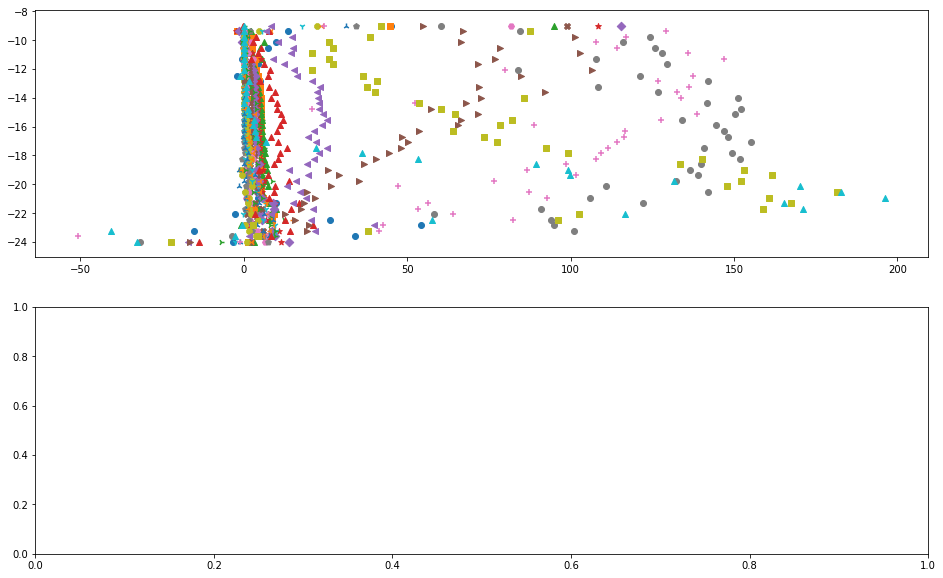

In [36]:
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
marker = paper.get_marker_iter()
y = np.array([])
for i in np.arange(20):
    p1 = np.array([-30.16 +3*i,-9])
    p2 = np.array([-30.16 +3*i,-24])
    n = 40
    x = np.zeros((n,2))
    x[:,0] = np.linspace(p1[0],p2[0],n)
    x[:,1] = np.linspace(p1[1],p2[1],n)
    sigmaeffective1 = get_slice_result (Phase,g_o.ResultTypes.Soil.SigmaEffective1,x)
    sigmaeffective3 = get_slice_result (Phase,g_o.ResultTypes.Soil.SigmaEffective3,x)
    residual = residual_of_yield_function(sigmaeffective1,sigmaeffective3,45)
    ax1.scatter(residual,x[:,1],cmap='gnuplot2',label='x = {}'.format(-27.25+3*i),
              marker=next(marker))
    y = np.append(y,residual)
    #ax2.hist(residual,label='x = {}'.format(-27.25+3*i))
sns.distplot(y,bins=20,ax=ax)
ax.grid()
ax.legend()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


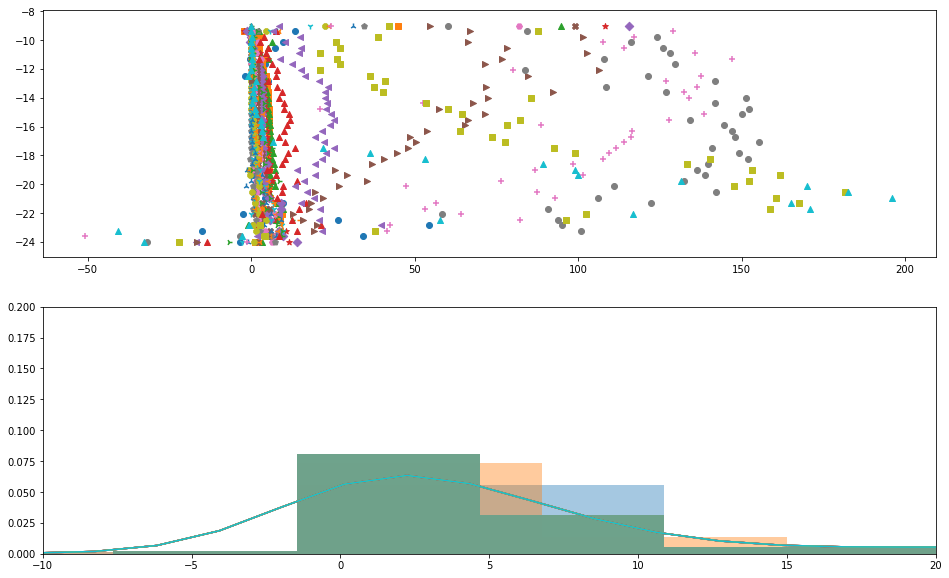

In [48]:
ax2 = fig.add_subplot(212)
sns.distplot(y,bins=40,ax=ax2)
ax2.set_xlim([-10,20])
ax2.set_ylim([0,0.2])
fig

In [16]:
ax.set_xlabel(r'$\Delta f/(\frac{\sigma_1-\sigma_3}{2} \times 1)\times 100\%$')
ax.set_xlim([0,40])

(0, 40)

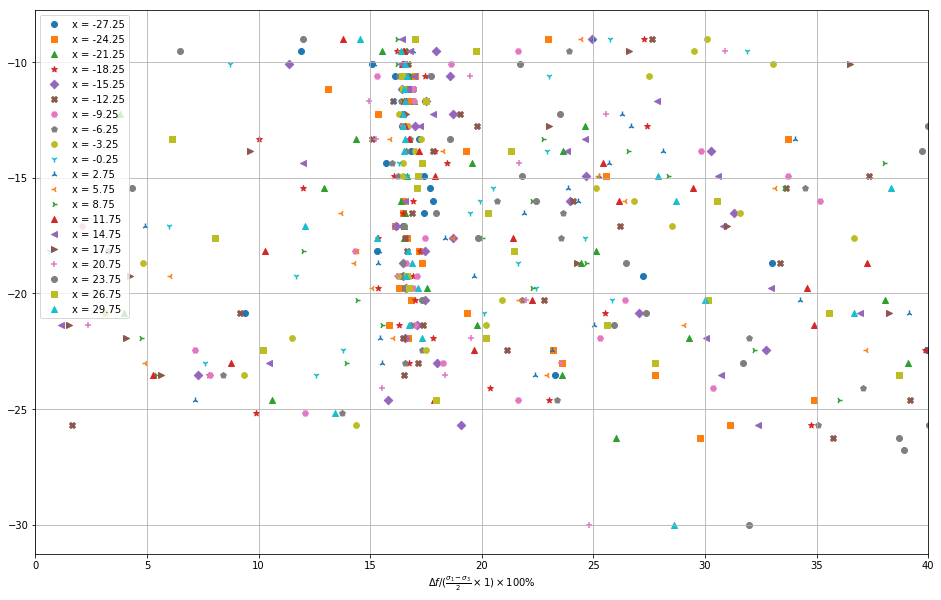

In [17]:
fig

In [ ]:
ax.set_ylabel?

In [33]:
ax.hist?